# ptb-diagnostic-ecg-database-1.0.0

In [3]:
# Instalar dependencia wfdb
# pip install wfdb

In [5]:
# Ruta al archivo 'records'
ruta_records = '/home/guillermo/ptb-diagnostic-ecg-database-1.0.0/RECORDS'

# Leer el archivo 'records' para obtener la lista de archivos
with open(ruta_records, 'r') as f:
    registros = f.read().splitlines()

# Ver los registros cargados
print(registros)

['patient001/s0010_re', 'patient001/s0014lre', 'patient001/s0016lre', 'patient002/s0015lre', 'patient003/s0017lre', 'patient004/s0020are', 'patient004/s0020bre', 'patient005/s0021are', 'patient005/s0021bre', 'patient005/s0025lre', 'patient005/s0031lre', 'patient005/s0101lre', 'patient006/s0022lre', 'patient006/s0027lre', 'patient006/s0064lre', 'patient007/s0026lre', 'patient007/s0029lre', 'patient007/s0038lre', 'patient007/s0078lre', 'patient008/s0028lre', 'patient008/s0037lre', 'patient008/s0068lre', 'patient009/s0035_re', 'patient010/s0036lre', 'patient010/s0042lre', 'patient010/s0061lre', 'patient011/s0039lre', 'patient011/s0044lre', 'patient011/s0049lre', 'patient011/s0067lre', 'patient012/s0043lre', 'patient012/s0050lre', 'patient013/s0045lre', 'patient013/s0051lre', 'patient013/s0072lre', 'patient014/s0046lre', 'patient014/s0056lre', 'patient014/s0071lre', 'patient015/s0047lre', 'patient015/s0057lre', 'patient015/s0152lre', 'patient016/s0052lre', 'patient016/s0060lre', 'patient01

In [7]:
import wfdb
import os

# Ruta base donde están las carpetas de los pacientes
ruta_base_datos = '/home/guillermo/ptb-diagnostic-ecg-database-1.0.0'

# Lista para almacenar todos los registros cargados
todos_los_registros = []

# Iterar sobre los registros del archivo 'records'
for registro in registros:
    try:
        # Construir la ruta completa para el archivo
        record_path = os.path.join(ruta_base_datos, registro)

        # Cargar el archivo
        record = wfdb.rdrecord(record_path)

        # Agregar el registro cargado a la lista
        todos_los_registros.append(record)

        print(f"Cargado: {record_path}")

    except Exception as e:
        print(f"Error cargando {record_path}: {e}")

print(f"Total de registros cargados: {len(todos_los_registros)}")

Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient001/s0010_re
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient001/s0014lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient001/s0016lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient002/s0015lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient003/s0017lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient004/s0020are
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient004/s0020bre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient005/s0021are
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient005/s0021bre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient005/s0025lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient005/s0031lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database-1.0.0/patient005/s0101lre
Cargado: /home/guillermo/ptb-diagnostic-ecg-database

In [8]:
# Mostrar información de uno de los registros cargados
if todos_los_registros:
    print(f"Primer registro cargado: {todos_los_registros[0].__dict__}")

# Número total de registros cargados
print(f"Total de registros cargados correctamente: {len(todos_los_registros)}")


Primer registro cargado: {'record_name': 's0010_re', 'n_sig': 15, 'fs': 1000, 'counter_freq': None, 'base_counter': None, 'sig_len': 38400, 'base_time': None, 'base_date': None, 'comments': ['age: 81', 'sex: female', 'ECG date: 01/10/1990', 'Diagnose:', 'Reason for admission: Myocardial infarction', 'Acute infarction (localization): infero-latera', 'Former infarction (localization): no', 'Additional diagnoses: Diabetes mellitus', 'Smoker: no', 'Number of coronary vessels involved: 1', 'Infarction date (acute): 29-Sep-90', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: 16-Oct-90', 'Ventriculography: Akinesia inferior wall', 'Chest X-ray: Heart size upper limit of norm', 'Peripheral blood Pressure (syst/diast):  140/80 mmHg', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Card

## Limpieza

In [12]:
from scipy.signal import butter, filtfilt

# Función para aplicar un filtro de paso bajo
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Aplicar el filtro a los registros cargados
for record in todos_los_registros:
    for i in range(len(record.sig_name)):  # Filtrar cada canal (derivación)
        record.p_signal[:, i] = butter_lowpass_filter(record.p_signal[:, i], cutoff=100, fs=1000)

# Visualizacion

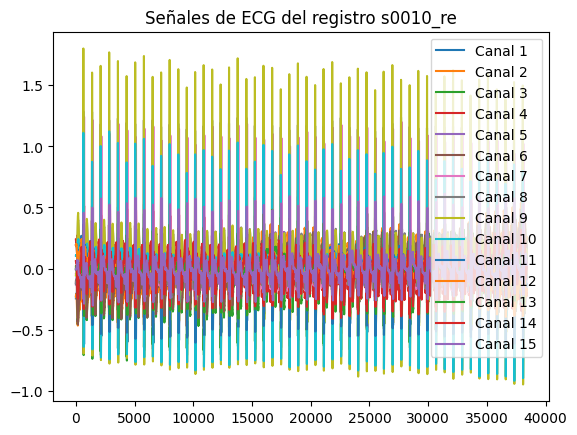

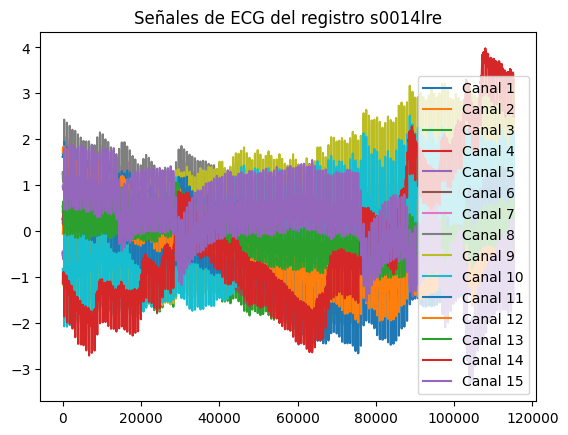

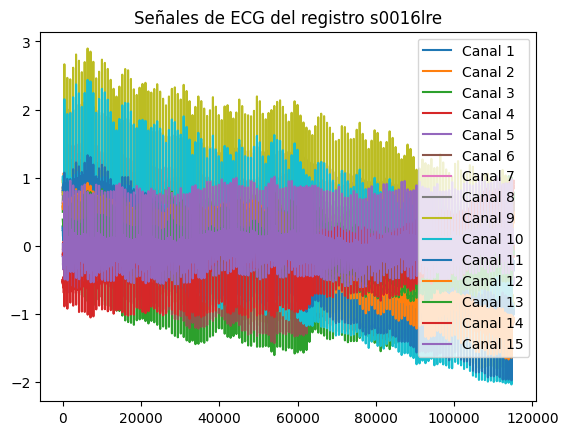

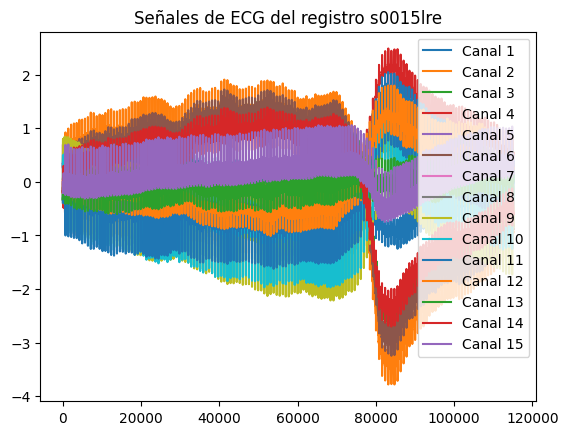

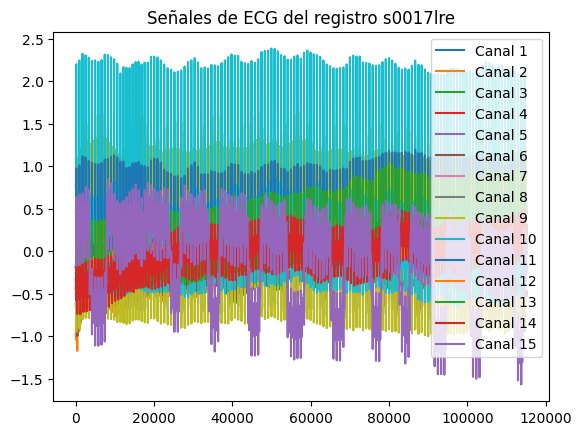

In [14]:
import matplotlib.pyplot as plt

# Visualizar algunas señales
for record in todos_los_registros[:5]:  # Solo visualizar los primeros 5 registros
    plt.figure()
    for i in range(len(record.sig_name)):
        plt.plot(record.p_signal[:, i], label=f'Canal {i+1}')
    plt.title(f'Señales de ECG del registro {record.record_name}')
    plt.legend()
    plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Supongamos que tienes las etiquetas (diagnósticos) de cada registro
# Aquí necesitarías una lista de etiquetas en formato binario (1 para anormal, 0 para normal)
# En este ejemplo es ficticio
etiquetas = [0, 1, 0, 1, 0]  # Reemplaza esto con las etiquetas reales

# Prepara los datos (usando la primera derivación de cada registro como ejemplo)
X = [record.p_signal[:, 0].flatten() for record in todos_los_registros[:5]]  # Solo 5 registros
y = etiquetas[:5]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo RandomForest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predecir
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.